# APS01 - Pedro Cunial 

O principal objetivo desta APS é a análise do dataset de jogadores da NBA disponibilizado pelo Kaggle (https://www.kaggle.com/amanajmera1/national-basketball-associationnba-dataset) com o objetivo de prever a posição de novos jogadores com base em suas informações prévias


### Método

Primeiramente, precisamos fazer os imports necessários, tal como abrir os arquivos de entrada ('Players.csv' e 'Season_Stats.csv').

Além disso, já podemos plotar alguns gráficos simples para ter algumas noções basicas do tipo de dado que estamos lidando.

In [541]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [542]:
# (not so) randomizer
RANDOM_SEED = 666
np.random.seed(RANDOM_SEED)

In [543]:
players = pd.read_csv('Players.csv')
seasons = pd.read_csv('Seasons_Stats.csv')

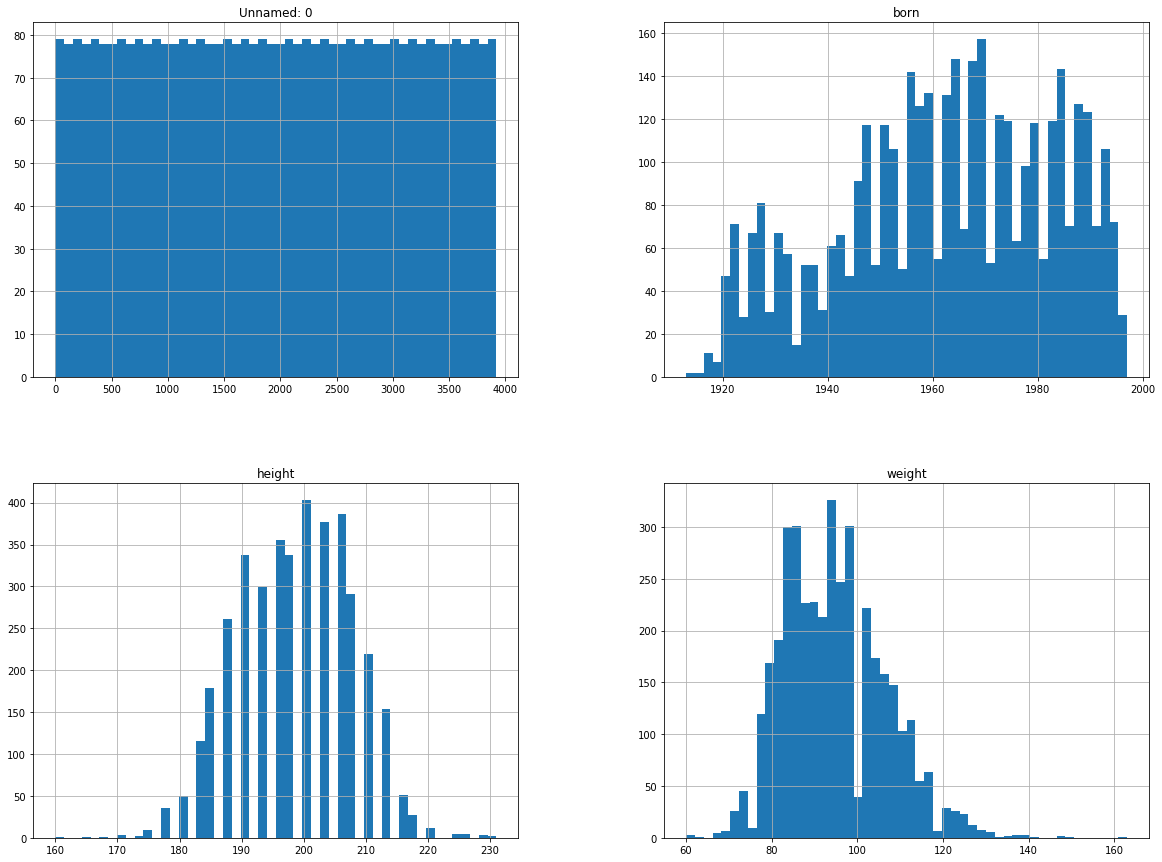

In [544]:
players.hist(bins=50, figsize=(20, 15))
plt.show()

In [545]:
players

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


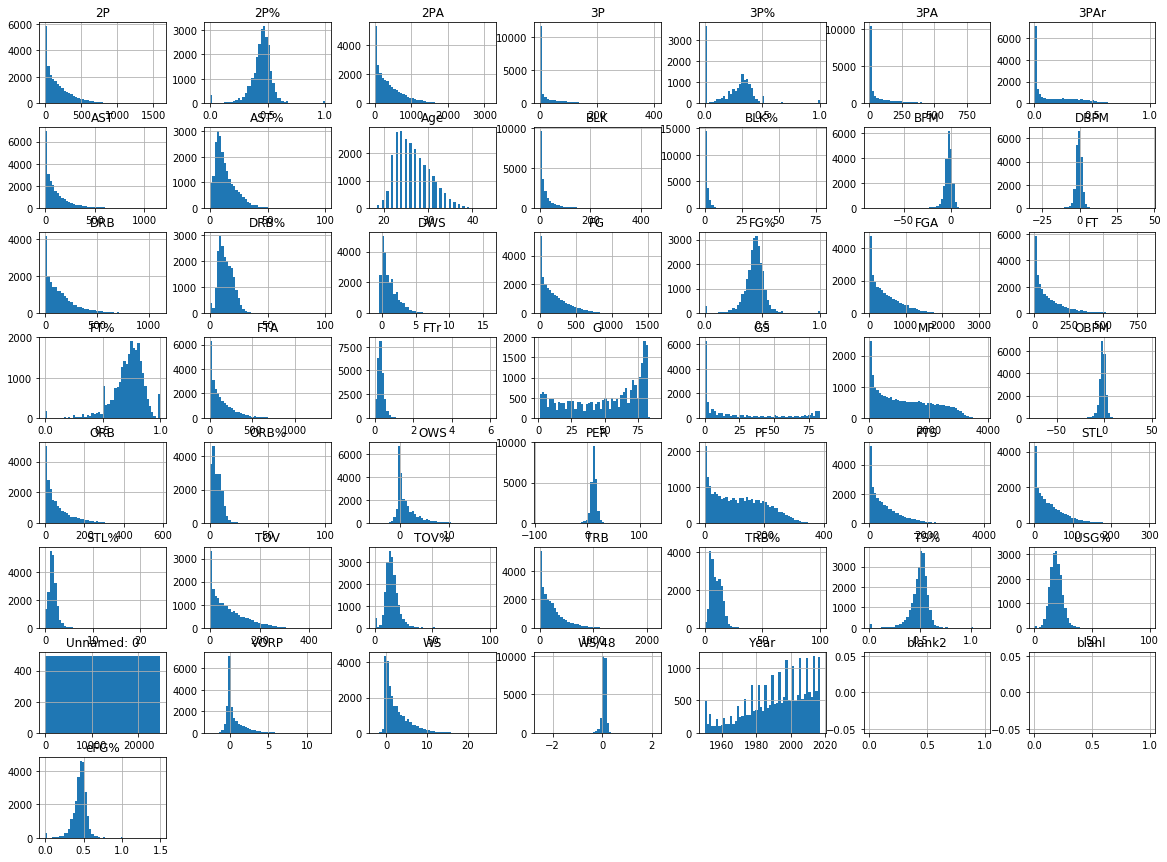

In [546]:
seasons.hist(bins=50, figsize=(20,15))
plt.show()

In [547]:
seasons

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [548]:
players.loc[players['height'].idxmax()]

Unnamed: 0                         1711
Player                       Manute Bol
height                              231
weight                               90
collage        University of Bridgeport
born                               1962
birth_city                      Gogrial
birth_state                 South Sudan
Name: 1711, dtype: object

In [549]:
seasons.loc[seasons['Age'].idxmax()]

Unnamed: 0           18736
Year                  2007
Player        Kevin Willis
Pos                     PF
Age                     44
Tm                     DAL
G                        5
GS                       0
MP                      43
PER                    6.3
TS%                  0.432
3PAr                     0
FTr                  0.154
ORB%                   5.7
DRB%                  16.4
TRB%                  11.2
AST%                   3.6
STL%                   2.5
BLK%                   1.8
TOV%                  12.6
USG%                  17.2
blanl                  NaN
OWS                      0
DWS                    0.1
WS                       0
WS/48                0.048
blank2                 NaN
OBPM                  -5.5
DBPM                   0.9
BPM                   -4.6
VORP                     0
FG                       5
FGA                     13
FG%                  0.385
3P                       0
3PA                      0
3P%                    NaN
2

### Unindo as duas tabelas

Com um conhecimento superficial da base, já podemos fazer algumas limpesas a fim de nos poupar de dados que serão inutilizáveis. No caso, tiramos todos as linhas das tabelas que possuam mais "NaNs" do que valores em si.

Com isso, podemos unir as duas tabelas utilizando o pandas.merge (equivalente a um inner join em SQL). Utilizamos uma estratégia similar ao inner join pois se um valor está presente em somente uma das tabelas, ele provavelmente não será suficiente para a nossa análise.

In [550]:
players.dropna(inplace=True, axis=0, thresh=len(players.columns)/2)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3921
Data columns (total 8 columns):
Unnamed: 0     3921 non-null int64
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 275.7+ KB


In [551]:
seasons.dropna(inplace=True, axis=0, thresh=len(seasons.columns)/2)
seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24102 entries, 488 to 24690
Data columns (total 53 columns):
Unnamed: 0    24102 non-null int64
Year          24102 non-null float64
Player        24102 non-null object
Pos           24102 non-null object
Age           24094 non-null float64
Tm            24102 non-null object
G             24102 non-null float64
GS            18233 non-null float64
MP            24102 non-null float64
PER           24097 non-null float64
TS%           24020 non-null float64
3PAr          18839 non-null float64
FTr           24007 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21568 non-null float64
AST%          22552 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24102 non-null float64
DWS           24102 non-null float64
WS        

In [552]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [553]:
df = pd.merge(players, seasons, on='Player')

In [554]:
df

,Unnamed: 0_x,Player,height,weight,collage,born,birth_city,birth_state,Unnamed: 0_y,Year,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,489,1952.0,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0
1,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,491,1952.0,...,0.652,NaN,NaN,430.0,255.0,NaN,NaN,NaN,196.0,820.0
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,621,1953.0,...,0.629,NaN,NaN,483.0,277.0,NaN,NaN,NaN,245.0,967.0
3,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho,493,1952.0,...,0.417,NaN,NaN,31.0,9.0,NaN,NaN,NaN,31.0,17.0
4,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania,494,1952.0,...,0.593,NaN,NaN,147.0,168.0,NaN,NaN,NaN,182.0,319.0
5,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania,622,1953.0,...,0.648,NaN,NaN,157.0,192.0,NaN,NaN,NaN,161.0,343.0
6,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,495,1952.0,...,0.835,NaN,NaN,219.0,90.0,NaN,NaN,NaN,121.0,500.0
7,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,623,1953.0,...,0.821,NaN,NaN,233.0,166.0,NaN,NaN,NaN,226.0,673.0
8,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,789,1954.0,...,0.864,NaN,NaN,130.0,77.0,NaN,NaN,NaN,128.0,420.0
9,10,Don Boven,193.0,95.0,Western Michigan University,1925.0,Kalamazoo,Michigan,496,1952.0,...,0.731,NaN,NaN,336.0,177.0,NaN,NaN,NaN,271.0,656.0


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24102 entries, 0 to 24101
Data columns (total 60 columns):
Unnamed: 0_x    24102 non-null int64
Player          24102 non-null object
height          24102 non-null float64
weight          24102 non-null float64
collage         21900 non-null object
born            24102 non-null float64
birth_city      22654 non-null object
birth_state     22613 non-null object
Unnamed: 0_y    24102 non-null int64
Year            24102 non-null float64
Pos             24102 non-null object
Age             24094 non-null float64
Tm              24102 non-null object
G               24102 non-null float64
GS              18233 non-null float64
MP              24102 non-null float64
PER             24097 non-null float64
TS%             24020 non-null float64
3PAr            18839 non-null float64
FTr             24007 non-null float64
ORB%            20792 non-null float64
DRB%            20792 non-null float64
TRB%            21568 non-null float64
AST%

In [556]:
# drop all columns with less than 20000 values
df.dropna(axis=1, thresh=20000, inplace=True) 

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24102 entries, 0 to 24101
Data columns (total 50 columns):
Unnamed: 0_x    24102 non-null int64
Player          24102 non-null object
height          24102 non-null float64
weight          24102 non-null float64
collage         21900 non-null object
born            24102 non-null float64
birth_city      22654 non-null object
birth_state     22613 non-null object
Unnamed: 0_y    24102 non-null int64
Year            24102 non-null float64
Pos             24102 non-null object
Age             24094 non-null float64
Tm              24102 non-null object
G               24102 non-null float64
MP              24102 non-null float64
PER             24097 non-null float64
TS%             24020 non-null float64
FTr             24007 non-null float64
ORB%            20792 non-null float64
DRB%            20792 non-null float64
TRB%            21568 non-null float64
AST%            22552 non-null float64
STL%            20792 non-null float64
BLK%

### Limpeza de dados

Com as tabelas já unidas, precisamos, finalmente, fazer uma limpeza mais refinada dos dados.

No caso, começamos tirando todos os valalores "NaN" da coluna da variável que estamos prevendo e depois passamos para limpezas mais finas.

Retiramos a coluna "Player" pois é uma variável absolutamente inútil para o estudo, servindo somente para a união das tabelas.

Em seguida, testamos a funcionalidade de um Imputer para as variáveis numéricas do nosso estudo e, dado o seu aparente sucesso, nos poupamos de retirar qualquer variável numérica do mesmo.

Por fim, tiramos os valores pouco presentes nas variáveis categóricas, pois faremos o split com base nelas e, se não for possível formar duas amostras com presença de pelo menos cada uma das permutações existentes na base em cada uma delas, o encoding delas se torna impossível.

In [558]:
df.dropna(subset=['Pos'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24102 entries, 0 to 24101
Data columns (total 50 columns):
Unnamed: 0_x    24102 non-null int64
Player          24102 non-null object
height          24102 non-null float64
weight          24102 non-null float64
collage         21900 non-null object
born            24102 non-null float64
birth_city      22654 non-null object
birth_state     22613 non-null object
Unnamed: 0_y    24102 non-null int64
Year            24102 non-null float64
Pos             24102 non-null object
Age             24094 non-null float64
Tm              24102 non-null object
G               24102 non-null float64
MP              24102 non-null float64
PER             24097 non-null float64
TS%             24020 non-null float64
FTr             24007 non-null float64
ORB%            20792 non-null float64
DRB%            20792 non-null float64
TRB%            21568 non-null float64
AST%            22552 non-null float64
STL%            20792 non-null float64
BLK%

In [559]:
df['Pos'].isnull().values.any()
# Ótimo!

False

In [560]:
df.dropna(axis=0, thresh=len(df.columns)/2)

,Unnamed: 0_x,Player,height,weight,collage,born,birth_city,birth_state,Unnamed: 0_y,Year,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,PTS
0,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,489,1952.0,...,51.0,0.588,NaN,NaN,81.0,70.0,NaN,NaN,56.0,126.0
1,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,491,1952.0,...,187.0,0.652,NaN,NaN,430.0,255.0,NaN,NaN,196.0,820.0
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,621,1953.0,...,259.0,0.629,NaN,NaN,483.0,277.0,NaN,NaN,245.0,967.0
3,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho,493,1952.0,...,12.0,0.417,NaN,NaN,31.0,9.0,NaN,NaN,31.0,17.0
4,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania,494,1952.0,...,167.0,0.593,NaN,NaN,147.0,168.0,NaN,NaN,182.0,319.0
5,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania,622,1953.0,...,162.0,0.648,NaN,NaN,157.0,192.0,NaN,NaN,161.0,343.0
6,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,495,1952.0,...,115.0,0.835,NaN,NaN,219.0,90.0,NaN,NaN,121.0,500.0
7,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,623,1953.0,...,201.0,0.821,NaN,NaN,233.0,166.0,NaN,NaN,226.0,673.0
8,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,789,1954.0,...,81.0,0.864,NaN,NaN,130.0,77.0,NaN,NaN,128.0,420.0
9,10,Don Boven,193.0,95.0,Western Michigan University,1925.0,Kalamazoo,Michigan,496,1952.0,...,350.0,0.731,NaN,NaN,336.0,177.0,NaN,NaN,271.0,656.0


In [561]:
df.drop(['Player'], axis=1, inplace=True)

In [562]:
df.dropna(subset=['collage', 'birth_city', 'birth_state', 'Tm'], inplace=True)

In [563]:
nba_cat = df[['collage', 'birth_city', 'birth_state', 'Tm']]
nba_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21044 entries, 0 to 24099
Data columns (total 4 columns):
collage        21044 non-null object
birth_city     21044 non-null object
birth_state    21044 non-null object
Tm             21044 non-null object
dtypes: object(4)
memory usage: 822.0+ KB


In [564]:
nba_encoder = CategoricalEncoder(encoding='onehot-dense')
encoder = nba_encoder.fit_transform(nba_cat)
encoder

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [565]:
nba_encoder.categories_

[array(['Alabama A&M University', 'Alabama State University',
        'Albany State University', 'Alcorn State University',
        'Alliance College', 'American International College',
        'American University', 'Appalachian State University',
        'Arizona State University', 'Auburn University',
        'Auburn University at Montgomery', 'Augsburg College',
        'Augusta State University', 'Augustana College (SD)',
        'Aurora University', 'Austin Peay State University',
        'Averett University', 'Ball State University',
        'Barton County Community College', 'Baylor University',
        'Belmont Abbey College', 'Belmont University',
        'Bemidji State University', 'Blinn College',
        'Boise State University', 'Boston College', 'Boston University',
        'Bowling Green State University', 'Bradley University',
        'Brigham Young University', 'Brigham Young University Hawaii',
        'Bucknell University', 'Butler University',
        'California P

In [566]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

nba_strip = df.drop(['collage', 'birth_city', 'birth_state', 'Tm', 'Pos'], axis=1)

imputer.fit(nba_strip)
print('Imputer stats:', imputer.statistics_)
print('Medians:', nba_strip.median().values)

Imputer stats: [ 2.01200e+03  2.01000e+02  9.50000e+01  1.96500e+03  1.21915e+04
  1.99500e+03  2.60000e+01  5.80000e+01  1.05600e+03  1.27000e+01
  5.07000e-01  2.94000e-01  5.40000e+00  1.25000e+01  9.10000e+00
  1.06000e+01  1.50000e+00  8.00000e-01  5.00000e-01  8.00000e-01
  1.40000e+00  7.50000e-02 -1.50000e+00 -5.00000e-01 -1.90000e+00
  0.00000e+00  1.43000e+02  3.23000e+02  4.41000e-01  1.25000e+02
  2.72000e+02  4.58000e-01  4.65000e-01  6.40000e+01  8.80000e+01
  7.47000e-01  3.80000e+01  1.03000e+02  1.59000e+02  6.90000e+01
  2.90000e+01  1.10000e+01  1.09000e+02  3.71000e+02]
Medians: [ 2.01200e+03  2.01000e+02  9.50000e+01  1.96500e+03  1.21915e+04
  1.99500e+03  2.60000e+01  5.80000e+01  1.05600e+03  1.27000e+01
  5.07000e-01  2.94000e-01  5.40000e+00  1.25000e+01  9.10000e+00
  1.06000e+01  1.50000e+00  8.00000e-01  5.00000e-01  8.00000e-01
  1.40000e+00  7.50000e-02 -1.50000e+00 -5.00000e-01 -1.90000e+00
  0.00000e+00  1.43000e+02  3.23000e+02  4.41000e-01  1.25000e+0

In [567]:
tmp = imputer.transform(nba_strip)
nba_tr = pd.DataFrame(tmp, columns=nba_strip.columns)

In [568]:
# checking
nba_tr[nba_tr.isnull().any(axis=1)].head()

,Unnamed: 0_x,height,weight,born,Unnamed: 0_y,Year,Age,G,MP,PER,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,PTS


In [569]:
df['Pos'].unique()
df['Pos'].value_counts()

PF       4353
PG       4219
SG       4198
SF       4078
C        3911
C-PF       31
G          28
PG-SG      27
SF-SG      26
PF-C       26
F          25
SG-PG      25
SG-SF      20
SF-PF      18
PF-SF      17
F-C        12
G-F         8
C-F         8
F-G         7
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [570]:
df['Pos'].value_counts()

PF       4353
PG       4219
SG       4198
SF       4078
C        3911
C-PF       31
G          28
PG-SG      27
SF-SG      26
PF-C       26
F          25
SG-PG      25
SG-SF      20
SF-PF      18
PF-SF      17
F-C        12
G-F         8
C-F         8
F-G         7
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [620]:
thresh = 80
df = df[(df.groupby('Tm').Tm.transform(len) > thresh)
       & (df.groupby('Pos').Pos.transform(len) > thresh)]
print(df['Tm'].value_counts())

TOT    1590
NYK     904
BOS     837
DET     809
PHI     795
MIL     717
ATL     712
LAL     701
CHI     699
HOU     673
CLE     663
GSW     663
PHO     647
POR     634
SAS     604
DEN     598
IND     554
NJN     553
SEA     550
DAL     527
LAC     526
UTA     510
SAC     475
MIA     445
ORL     403
MIN     384
WSB     345
TOR     324
WAS     301
MEM     243
CHH     230
CHA     150
CIN     143
NOH     142
KCK     142
STL     125
OKC     122
BAL     121
BUF     102
PHW      97
VAN      95
SYR      92
SDC      91
SFW      85
Name: Tm, dtype: int64


### Iniciando as análises

Com os dados finalmente limpos, podemos dividir a nossa base em dados de teste e dados de treinamento e teste.

Normalmente usaria o "train_test_split" para isso, mas por algum motivo que não entendi exatamente qual ao fazer o split valores "NaN" estavam surgindo na coluna "Pos" (apesar de termos limpados todos os "NaN"s previamente dela).

Por isso, acabei utilizando o "StratifiedShuffleSplit", uma vez que ele me divide apenas em conjunto de teste e treinamento, permitindo que refaça esta limpeza.

In [621]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=RANDOM_SEED)
for train_idx, test_idx in split.split(df, df[['Pos', 'Tm']]):
    traindata = df.loc[train_idx]
    testdata = df.loc[test_idx]

/home/gil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/home/gil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [622]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16098 entries, 12612 to 8227
Data columns (total 49 columns):
Unnamed: 0_x    13671 non-null float64
height          13671 non-null float64
weight          13671 non-null float64
collage         13671 non-null object
born            13671 non-null float64
birth_city      13671 non-null object
birth_state     13671 non-null object
Unnamed: 0_y    13671 non-null float64
Year            13671 non-null float64
Pos             13671 non-null object
Age             13671 non-null float64
Tm              13671 non-null object
G               13671 non-null float64
MP              13671 non-null float64
PER             13670 non-null float64
TS%             13625 non-null float64
FTr             13615 non-null float64
ORB%            11950 non-null float64
DRB%            11950 non-null float64
TRB%            12418 non-null float64
AST%            13030 non-null float64
STL%            11950 non-null float64
BLK%            11950 non-null floa

In [623]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

traindata.dropna(subset=['Pos'], inplace=True)

xtrain = traindata.drop("Pos", axis=1)
ytrain = traindata["Pos"].copy()

### Criando a pipeline

Com o conjunto já separdo, precisamos fazer uma pipeline inicial para o tratamento do mesmo de maneira automatizada.

Primeiramente precisamos separar as variáveis categóricas das numéricas. Para as categóricas, utilizei apenas a
coluna "Tm", uma vez que o uso de mais de uma coluna categórica torna o estudo muito mais complexo e quase inviável
para a quantidade disponível de dados.

Com isso, montamos uma pipeline para as variáveis categóricas onde apenas precisamos transformálas em uma numérica
para o estudo final (utilizamos o CategoricalEncoder com a estratégia de one-hot encoding para isso) e uma pipeline numérica com o Imputer (préviamente vimos que a estratégia estava funcionando nos nossos dados) e um scaler (para normalizar os dados).

In [624]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, at_name):
        self.at_name = at_name
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[list(self.at_name)].values
    
class NaNDropper(BaseEstimator, TransformerMixin):
    def __init__(self, cat_attrs, all_attrs):
        self.cat_attrs = cat_attrs
        self.all_attrs = all_attrs
            
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        if isinstance(x, np.ndarray):
            x = pd.DataFrame(data=x, columns=self.all_attrs)
        return x.dropna(subset=self.cat_attrs, axis=0, inplace=False)
    
num_attribs = list(xtrain.drop(['collage',
                     'birth_city',
                     'birth_state', 
                     'Tm'], axis=1))
cat_attribs = ['Tm']

num_pipeline = Pipeline([
    ('selector', DFSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DFSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding='onehot-dense'))
])


In [625]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline', cat_pipeline),
    ('num_pipeline', num_pipeline),
])

In [626]:
train_final = full_pipeline.fit_transform(xtrain)
train_final[:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.48562099,
         0.93799236,  0.35676616,  0.43225924,  0.11755703,  0.2637233 ,
        -0.32151365,  1.11680234,  0.03852315,  1.06695503,  1.24139058,
         0.60068802,  1.34803838,  1.21741263,  1.43337776, -0.94217195,
        -0.16989928,  1.1401518 ,  0.67009077,  0.32390335,  0.60356684,
         1.0494174 ,  0.52567526, -0.12119634,  0.3

### Treinando o nosso classificador

Primeiramente preciso explicar porque utilizei o RandomForestClassifier. A razão é bem simples e triste na verdade, os outros classificadores simplesmente não rodaram por questões de memória ram no meu computador, tal que o RandomForest foi o único que consegui utilizar.

Com isso, busquei encontrar os melhores hiper parâmetros para o mesmo. O valor original de "n_estimators" é 10, mas após testes extensivos com o GridSearchCV quanto ao mesmo, cheguei ao valor de 350.

In [642]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
gscv = GridSearchCV(rfc, {'n_estimators': [10, 100, 200, 350, 500]})
gscv.fit(train_final, ytrain)
gscv.best_params_

{'n_estimators': 350}

In [645]:
from sklearn.metrics import accuracy_score

best = gscv.best_estimator_
accuracy_score(ytrain, best.predict(train_final))

1.0

In [646]:
testdata.dropna(subset=['Pos'], inplace=True)

xtest = testdata.drop('Pos', axis=1)
ytest = testdata['Pos'].copy()

test_final = full_pipeline.fit_transform(xtest)
accuracy_score(ytest, best.predict(test_final))

0.7987751531058618

## Conclusões finais

Com o modelo escolhido, foi possível chegar a uma acurácia de quase 80%, o que é bastante razoável considerando a grande quantidade de posições possíveis segundo a formatação original dos dados.

Apesar disso, sabemos que existem apenas 5 posições no basquete e que a maioria dos valores da coluna "Pos" são na verdade permutações entre duas posições (por exemplo armador/pivot). Para um estudo mais preciso, seria interessante considerar os jogadores com mais de uma posição como pertencentes as duas posições e checar a acurácia deste novo modelo.

Outra opção seria conferir as opções mais provaveis (por exemplo, as "top 3" posições recomendadas para o jogador) e ver se a posição verdadeira consta nelas. Esta opção é mais tangível e talvez seja um bom próximo passo a partir do estudo atual.